In [ ]:
In questo esercizio è stato realizzato un random walk, sia nel discreto (estrazione random uniforme delle direzione) che nel continuo 
(estrazione random uniforme dell'angolo solido). Per ogni i-esimo passo fatto, il camminatore ritorna nel punto di partenza, ovvero l'origine.
Nel grafico è plottato il valore quadratico medio della distanza percorsa, in funzione del numero di blocchi. 
Il fit con la funzione k*rad(n) mostra un comportamento diffusivo. 

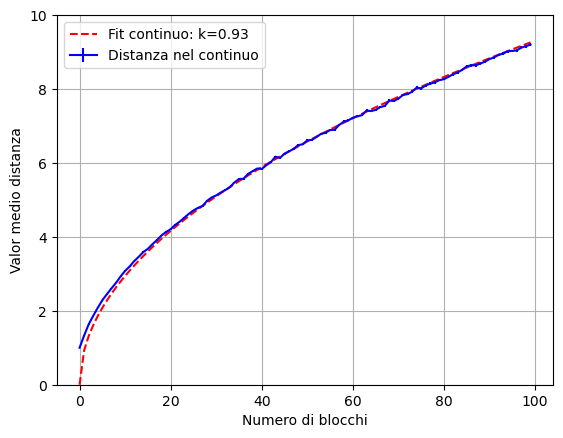

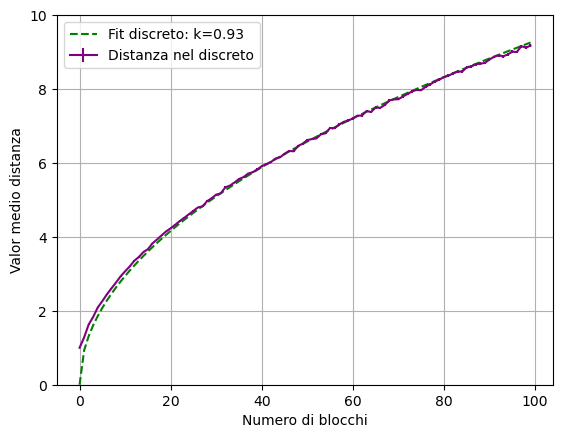

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def read_data_from_file(filename):
    mediadisc = []
    errdisc = []
    mediacont = []
    errcont = []

    with open(filename, 'r') as file:
        next(file)
        for line in file:
            values = line.split()
            mediadisc.append(float(values[0]))
            errdisc.append(float(values[1]))
            mediacont.append(float(values[2]))
            errcont.append(float(values[3]))
            
    return mediadisc, errdisc, mediacont, errcont

mediadisc, errdisc, mediacont, errcont = read_data_from_file("pos.dat") 

def func(x, k):
    return k * np.sqrt(x)

# Fit per i dati continui
x = np.arange(100, dtype=float)
popt_cont, pcov_cont = curve_fit(func, x, mediacont)

# Plot dei dati e dei fit
plt.errorbar(x, np.array(mediacont), yerr=np.array(errcont), color='blue', label='Distanza nel continuo')
plt.plot(x, func(x, *popt_cont), 'r--', label='Fit continuo: k=%.2f' % popt_cont[0])


plt.xlabel('Numero di blocchi')
plt.ylabel('Valor medio distanza')
plt.ylim(0, 10)
plt.grid(True)
plt.legend()
plt.show()

# Fit per i dati discreti
z = np.arange(100, dtype=float)
popt_disc, pcov_disc = curve_fit(func, z, mediadisc)

# Plot dei dati e dei fit
plt.errorbar(z, np.array(mediadisc), yerr=np.array(errdisc), color='purple', label='Distanza nel discreto')
plt.plot(z, func(z, *popt_disc), 'g--', label='Fit discreto: k=%.2f' % popt_disc[0])

plt.xlabel('Numero di blocchi')
plt.ylabel('Valor medio distanza')
plt.ylim(0, 10)
plt.grid(True)
plt.legend()
plt.show()